21.48


<AxesSubplot:xlabel='Date'>

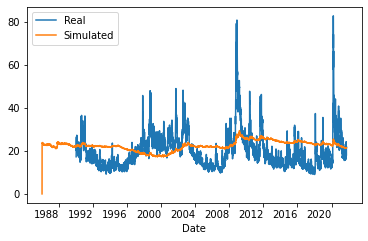

In [11]:
from datetime import datetime, timedelta

import pandas as pd
import matplotlib.pyplot as plt

start_date = "1986-01-03"
start_date_extra = "1986-01-02"
end_date = "2021-09-30"

df_vix_real = pd.read_csv("^VIX.csv")
df_vix_real["Date"] = pd.to_datetime(df_vix_real["Date"])
df_vix_real.set_index("Date", inplace=True)
df_vix_real = df_vix_real[start_date_extra:end_date]

#print(df_vix_real)

df_spx = pd.read_excel("SPX.xlsx")
df_spx["Date"] = df_spx["Date"].dt.date
df_spx["Percent Change"] = df_spx["Open"].pct_change(1)
df_spx["Change"] = df_spx["Open"].diff(periods = 1)
df_spx = df_spx.sort_values(by=['Date'], ascending=False)
#df_spx.set_index("Date", inplace=True)
df_spx["Vix"] = 0.0

startval = df_vix_real["Open"][end_date]
print(startval)
df_spx.at[ 9039, "Vix"] = startval
k = -0.35
for i in range(9038, 0, -1):
    #df_spx.at[ i, "Vix"] = (df_spx.at[ i+1, "Vix"]) + df_spx.at[ i+1, "Change"]/30.0
    df_spx.at[ i, "Vix"] = (df_spx.at[ i+1, "Vix"])/ ((1.001 * k if df_spx.at[ i+1, "Percent Change"] < 0 else 0.90*k) * df_spx.at[ i+1, "Percent Change"] + 1)
    #df_spx.at[ i, "Vix"] = (df_spx.at[i+1, "Vix"])/ (0.06 * df_spx.at[ i+1, "Change"]+1)
df_spx.set_index("Date", inplace=True)
#print(df_spx)
vix_graph = df_vix_real["Open"]
#print(vix_graph)
vix_graph.plot(legend=True, label="Real")
vix_sim_graph = df_spx["Vix"] 
vix_sim_graph.plot(legend=True, label="Simulated")


<AxesSubplot:xlabel='Date'>

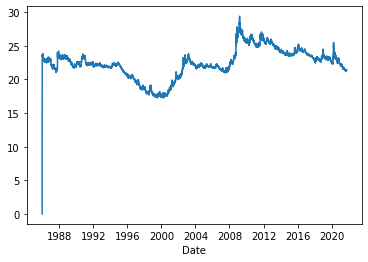

Date
1990-01-02    17.240000
1990-01-03    18.190001
1990-01-04    19.219999
1990-01-05    20.110001
1990-01-08    20.260000
                ...    
2021-09-24    19.330000
2021-09-27    17.780001
2021-09-28    19.740000
2021-09-29    22.070000
2021-09-30    21.480000
Name: Open, Length: 8000, dtype: float64


<AxesSubplot:xlabel='Date'>

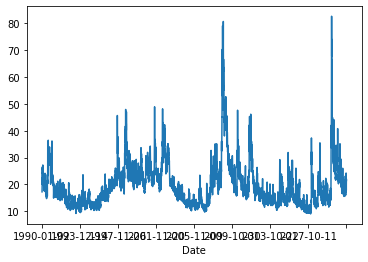

<AxesSubplot:xlabel='Date'>

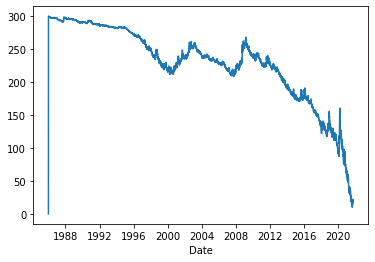